In [1]:
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1608621570351_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-0>

<!-- ![image.png](attachment:image.png) -->

<!-- <div style="background-image: url('dbgroup.PNG');">  
<div style="margin-left:25px; padding-top:350px; padding-bottom:80px; text-align: center;">   
<span style="color: #FFF; font-size: 30px; font-family:'Cambria'; text-shadow: 3px 3px 3px #000000">MSDS 2021 | Big Data and Cloud Computing</span><br><br>
<div style="text-align: center;">        
<span style="color: #FFF; text-align:center; font-size: 100px; text-shadow: 3px 3px 3px #000000; font-family: 'Tw Cen MT Condensed';">PREDICT(EU STOCK MARKET)</span> <br>
<span style="color: #FFF ; font-size: 35px; font-family:'Cambria'; text-shadow: 3px 3px 3px #000000;"><b>European Stock Price Movement Prediction using <br> The Deutsche Börse Public Dataset<br> </b></span>
</div>
</div>
</div> -->

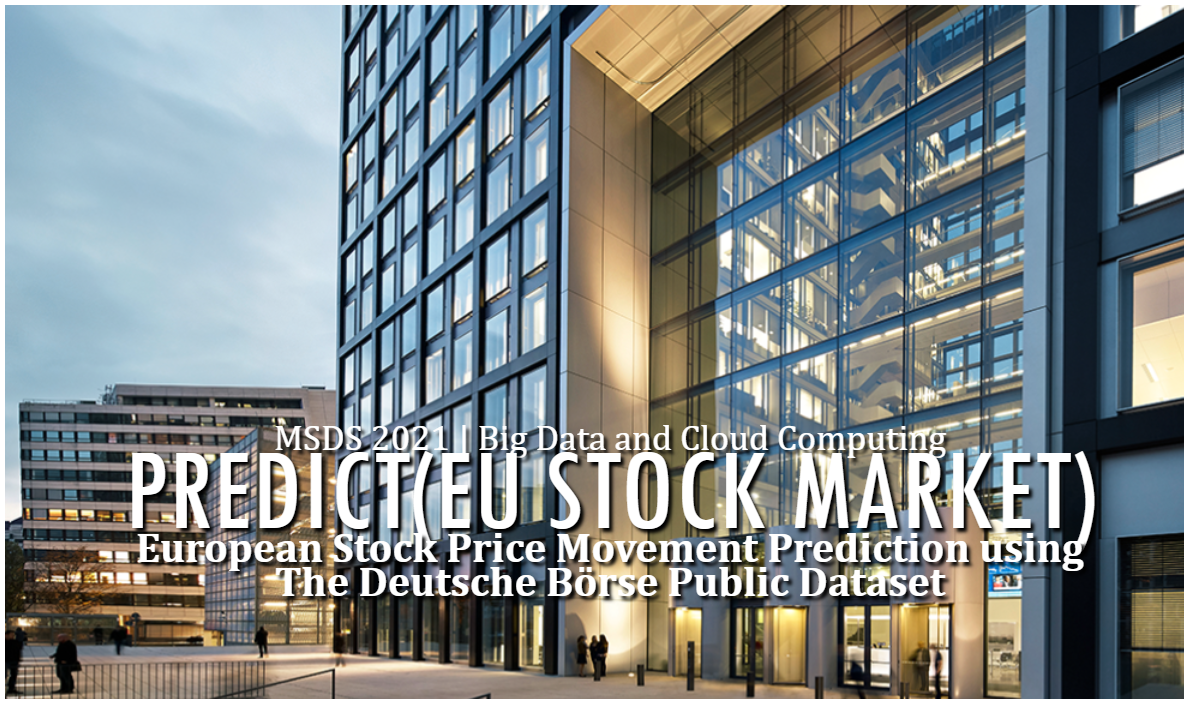

<h1 style="font-size: 25px; color:#CC171D; align: center; #777777; font-family: 'Roboto Light'">EXECUTIVE SUMMARY</h1>

The accurate prediction of financial stock markets has been challenging, making it one of the most critical research areas and applications for a long time. With the induction of artificial intelligence, machine learning, and computational capabilities to process even big data, numerous studies were conducted to prove the efficiency of predicting stock prices using programmed methods. **In this work, we implemented a basic machine learning algorithm that analyzes a specific stock's historical price data and tries to predict the closing price for the next 20 days/months. Also, a classification model was created to predict if the stock price will go up or down, given the same duration.** Preliminary EDA was also conducted further to understand the data and the EU market performance context. Only the Daimler AG (DAI) stock was considered for this project since it has the most transactions per day.  The Deutsche Börse Public Data Set, which was retrieved from the Registry of Open Data on AWS, was used as the source of financial data. Given the size of the raw data (11.2 GB), the whole project was processed by creating an AWS EMR cluster (one master and two cores) in AWS. The regression and classification models were then evaluated using standard strategic indicators such as the Mean Absolute Error (MAE) and the ROC Curve, respectively. The following insights/results were obtained:  

 

- A Linear Regression model to predict stock prices of Daimler AG/Mercedes-Benz (DAI), using PySpark's MLlib package, resulted in a Mean Absolute Error (MAE) of $19.469$.
- Decision Trees Classifier outperforms other linear or tree-based ensemble methods in classifying if DAI's stock price will increase or decrease relative to the previous day's price, obtaining an AUC ROC score of $0.5833$.
- Decision Trees can be trained very fast and can do an excellent job of fitting time series data with seasonality. However, given the current economic situation brought about by the pandemic, which was not seen by the model in previous years, accuracy or performance can be relatively low, which explains why only an AUC ROC score of $0.5833$ was obtained. 

<h1 style="font-size: 25px; color:#4d181c; align: center; #777777; font-family: 'Roboto Light'">INTRODUCTION</h1>

The financial market is a dynamic and diverse ecosystem where people can buy and sell currencies, equitues, stocks, and other derivatives over virtual platforms that are supported by brokers. The stock market allows investors to own shares of public companies through trading either by exchange or over-the-counter markets. This market has provided investors the opportunity of profiting by investing small initial amounts of money. The stock market is also defined to be full of uncertainty and volatility caused by a vast number of factors. 

Stock Price Prediction has been one of the most desired, and at the same time, one of the most challenging projects undertaken in the field of Machine Learning. The complexity with stock prediction lies in the factors affecting a certain stock price -  physical factors vs. physiological, rational and irrational behavior, company performance, etc. These factors combine to make share prices volatile and very difficult to predict with a high degree of accuracy. How does machine learning change the game in this domain? Machine Learning techniques have the potential to bring to the surface patterns and insights using features such as news sentiment, latest announcements about a company, semi-annual or quarterly company performance, and many more. There are vast sources of data that can are used to improve prediction accuracy. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

   - `Fundamental Analysis` involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
   - `Technical Analysis`, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

**Deutsche Börse AG or the Deutsche Börse Group**, is a marketplace organizer for the trading of shares and other securities. It is also a transaction services provider and an innovative market infrastructure provider. It gives companies and investors access to global capital markets. It is a joint stock company and was founded in 1993. The headquarters are in Frankfurt. In addition, the Group develops state-of-the-art IT solutions and offers IT systems all over the world.

<!-- <img src="dblogo.PNG"> -->
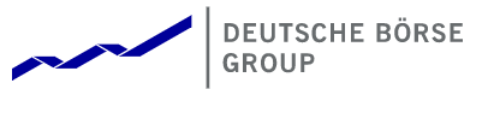
<p style = 'text-align: center;'><b>Figure 1. </b>Deutsche Börse AG Logo</p>

<h1 style="font-size: 25px; color:#162336; align: center; #777777; font-family: 'Roboto Light'">DATA DESCRIPTION</h1>

The `Deutsche Börse Public Data Set` consists of trade data aggregated to one minute intervals from the Eurex and Xetra trading systems. It provides the initial price, lowest price, highest price, final price and volume for every minute of the trading day, and for every tradeable security. If you need higher resolution data, including untraded price movement. Each file consisted of the following columns:

1. **`ISIN` :** An International Securities Identification Number (ISIN) is a code that uniquely identifies a specific securities issue. The organization that allocates ISINs in any particular country is the country's respective National Numbering Agency (NNA).<br>
2. **`Mnemonic` :** The Ticker or the Stock Symbol is a unique series of letters assigned to a security for trading purposes. <br>
3. **`SecurityDesc` :** Description of the traded security. <br>
4. **`SecurityType` :** The type of security which can be `Common Stock`, `ETC`, `ETF`, `ETN`, `Others`.<br>
5. **`Currency` :** Primary medium of exchange that was used for trading.<br>
6. **`SecurityID` :** Security ID given to a specific security. <br>
7. **`Date` :** Date when the trade transaction was conducted. <br>
8. **`Time` :** Time when the trade transaction was conducted.<br>
9. **`StartPrice` :** The opening price is the price at which a security first trades upon the opening of an exchange on a trading day. <br>
10. **`MaxPrice` :** The maximum traded price.<br>
11. **`MinPrice` :** The minimum traded price<br>
12. **`EndPrice` :** A stock's closing price is the standard benchmark used by investors to track its performance over time. The closing price is the last price at which the stock traded during the regular trading day. <br>
13. **`TradedVolume` :** Trading volume is a measure of how much of a given financial asset has traded in a period of time. For stocks, volume is measured in the number of shares traded. <br>
14. **`NumberOfTrades` :** Number of trades per traded volume.<br>

<u>File type:</u> <b>`csv` file</b>
    
<u>Update Frequency:</u> <b>`The data is updated every minute during trading hours.`</b>
    
<u>Source:</u>   
<b>`Deutsche Börse Public Dataset` <i>(https://registry.opendata.aws/deutsche-boerse-pds/)</i> </b>   


<h1 style="font-size: 25px; color:#CC171D; align: center; #777777; font-family: 'Roboto Light'">METHODOLOGY</h1>

The methodology of the report aims to <b>explore The Deutsche Börse Public Dataset and try to predict certain European Stock Prices.</b> The challenge of being able to do an exploratory analysis of the the data and understand the underlying behavior within the data deals with delving into the dataset obtained online. The analysis workflow (as illustrated in <b>Figure 2</b>) for doing the exploratory and descriptive analysis, as well as the stock price prediction involves: 


1. **Data Retrieval/Collection** - We started by setting up our AWS EMR cluster in order to be able to read data from the S3 bucket. Retrieved data was in `csv` format and was obtained from the The Deutsche Börse Public Dataset found in the Registry of Open Data on AWS. Data will be loaded as pyspark dataframes. The raw data has a total size of 11 GB, which contains per minute trade data of the European Stock Market.
2. **Data Cleaning and Pre-processing** - Once data is collected, data is cleaned and pre-processed by converting data into appropriate data types that will be used for analysis.     
3. **Exploratory Data Analysis (EDA)** - Do an exploratory data analysis (EDA) to check trends, patterns, and data behaviour within the data.   
4. **Stock Price Movement Prediction** - Regression and Classification models were used to predict price and its movement (up or down). Several metrics were also used to evaluate the performance of the model. 
5. **Ingihts and Recommendations** - Generate insights based on the results of the analysis. Provide recommendations to further improve the study based on the results. 

<!-- ![image.PNG](mp3_methodology.PNG) -->
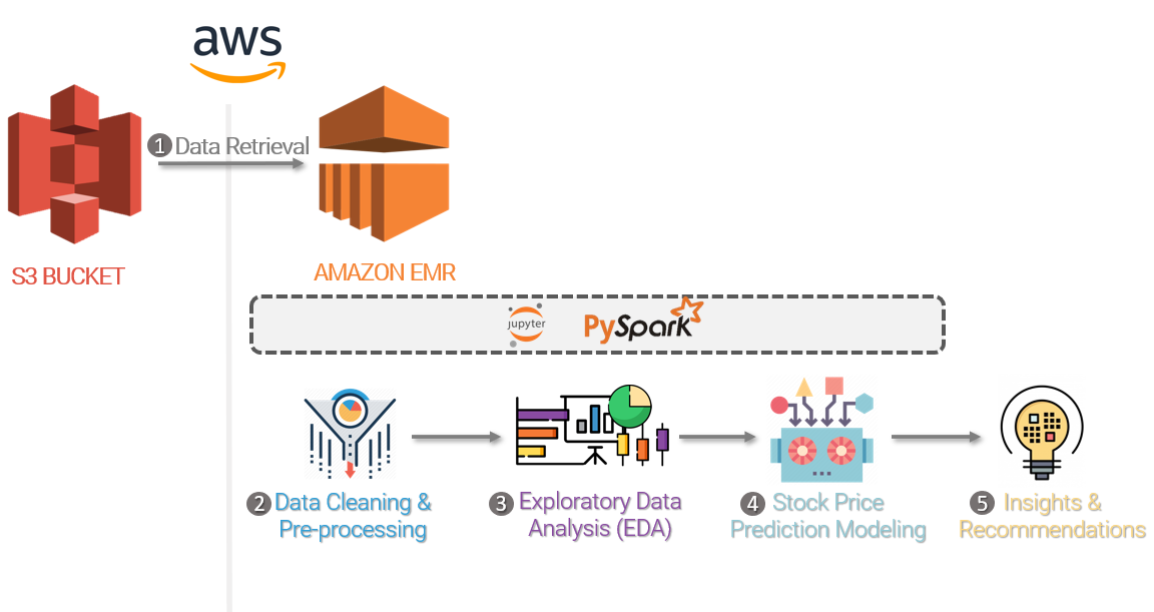
<p style = 'text-align: center;'><b>Figure 2. </b>Methodology for the Prediction of Stock Prices using The Deutsche Börse Public Dataset</p>

<h1 style="font-size: 25px; color:#325765; align: center; #777777; font-family: 'Roboto Light'">EMR Setup</h1>

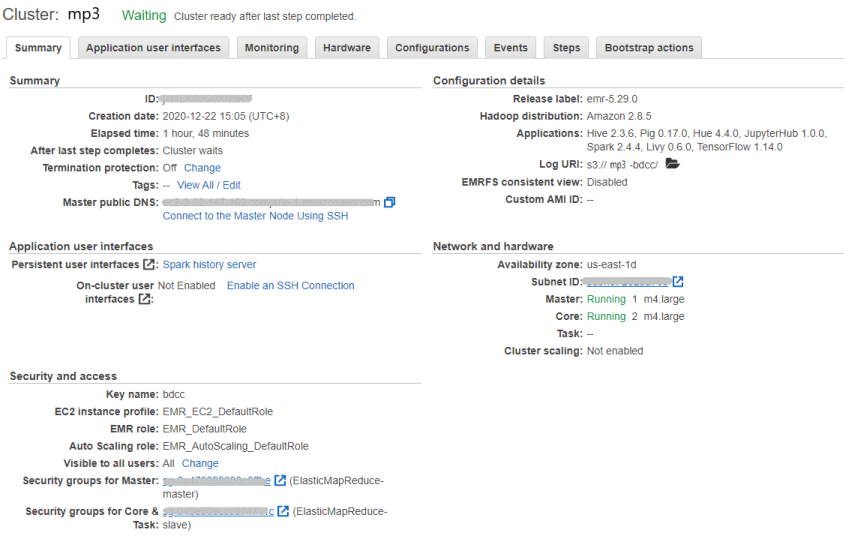
<p style = 'text-align: center;'><b>Figure 3. </b>EMR Setup Summary</p>

**Figure 3** shows the setup parameters for the cluster. Please note that the elapsed time is not the entire duration of running the notebook, but instead the elapsed time when the screenshot was taken.

<h1 style="font-size: 25px; color:#325765; align: center; #777777; font-family: 'Roboto Light'">DATA PRE-PROCESSING</h1>

## Imports

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------------------
absl-py                    0.8.1
astor                      0.8.0
beautifulsoup4             4.8.1
bleach                     3.1.0
boto                       2.49.0
funcsigs                   1.0.2
gast                       0.3.2
google-pasta               0.1.7
grpcio                     1.24.3
html5lib                   1.0.1
jmespath                   0.9.4
Keras-Applications         1.0.6
Keras-Preprocessing        1.0.5
lxml                       4.4.2
Markdown                   3.1.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.3.3
protobuf                   3.10.0
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 51.1.0.post20201221
six                        1.13.0
soupsieve

In [3]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("matplotlib==3.1.1")
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1608622199116-0
    Can't uninstall 'numpy'. No files were found to uninstall.



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-applications 1.0.6 requires h5py, which is not installed.
python36-sagemaker-pyspark 1.2.6 requires pyspark==2.3.2, which is not installed.

In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
from pyspark.sql.types import *
from pyspark.sql import Window
import pyspark.sql.functions as F
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import RegressionEvaluator as score
from pyspark.ml.evaluation import BinaryClassificationEvaluator

## Checking the Size of Raw Data (Requirement: >= 8 GB)

Xetra and Eurex are two trading platforms that are both operated and under The Deutsche Börse Group. `Xetra` is the fully-electronic cash market trading system that enables trading in shares and warrants on a single platform from any location in the European Union and Switzerland. `Eurex` is the world's largest futures and options exchange that is jointly operated by The Deutsche Börse Group and Swiss Exchange. Both folders were pulled to reach the 8+ GB requirement, but only the `Xetra` folder was used for further analysis. Combined, both folders account to ~11 GB.

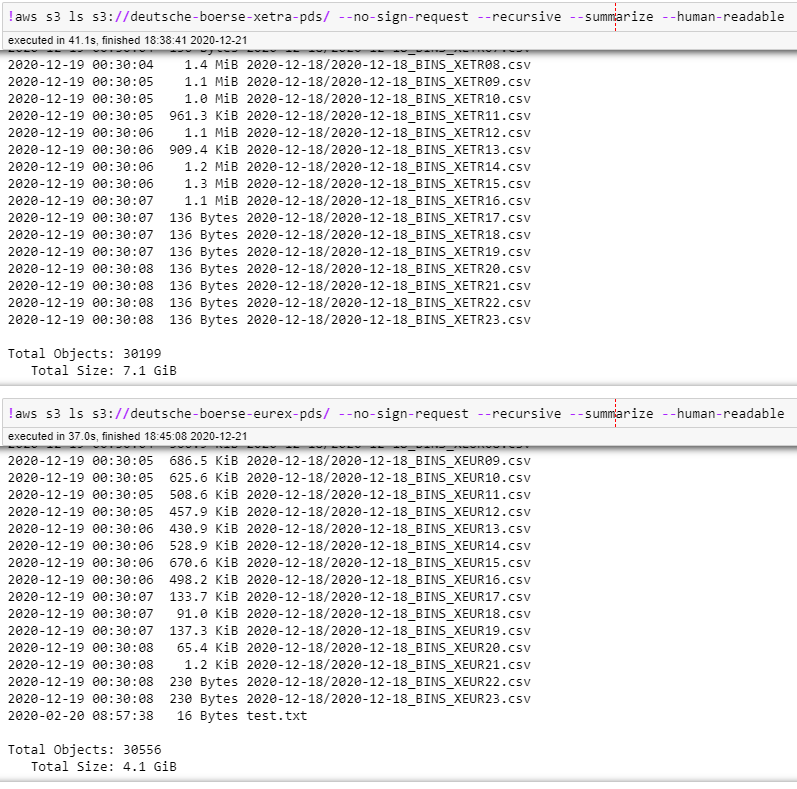
<p style = 'text-align: center;'><b>Figure 4. </b>Finding the size of the complete dataset</p>

## Loading the Data

In [6]:
schema = StructType([
 StructField("ISIN", StringType()),
 StructField("Mnemonic", StringType()),
 StructField("SecurityDesc", StringType()),
 StructField("SecurityType", StringType()),
 StructField("Currency", StringType()),
 StructField("SecurityID", StringType()),
 StructField("Date", StringType()),
 StructField("Time", StringType()),
 StructField("StartPrice", DoubleType()),
 StructField("MaxPrice", DoubleType()),
 StructField("MinPrice", DoubleType()),
 StructField("EndPrice", DoubleType()),
 StructField("TradedVolume", IntegerType()),
 StructField("NumberOfTrades", IntegerType())])

df = (spark.read.csv('s3://deutsche-boerse-xetra-pds/*/*.csv', sep=',',
                     header=True, schema=schema))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- ISIN: string (nullable = true)
 |-- Mnemonic: string (nullable = true)
 |-- SecurityDesc: string (nullable = true)
 |-- SecurityType: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- SecurityID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- StartPrice: double (nullable = true)
 |-- MaxPrice: double (nullable = true)
 |-- MinPrice: double (nullable = true)
 |-- EndPrice: double (nullable = true)
 |-- TradedVolume: integer (nullable = true)
 |-- NumberOfTrades: integer (nullable = true)

In [8]:
df.limit(5).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           ISIN Mnemonic  ... TradedVolume NumberOfTrades
0  AT0000A0E9W5     SANT  ...         2200             13
1  AT0000644505      LEN  ...           70              2
2  AT0000785407      FAA  ...           14              1
3  AT0000821103      UN9  ...          250              1
4  CA0679011084      ABR  ...         4561              2

[5 rows x 14 columns]

In [9]:
df_eurex = (spark.read.csv('s3://deutsche-boerse-eurex-pds/*/*.csv', sep=',', header=True, schema=schema))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Data Pre-processing

### Choosing Specific Stocks to Predict

The basis for choosing which stock to predict, out of the 2,950 companies/stocks available in the dataset was the **one with the most number of transactions.** The 10 companies/securities below are the ones with the highest transaction number per day. For this particular study, we will be using Daimler AG, commonly known and referred to as Mercedes-Benz, or simply as Daimler with ticker symbol, **DAI**.

In [10]:
top = (df.groupby('Mnemonic')
         .count()
         .orderBy('count', ascending=False)
         .limit(10).toPandas())
top_l = top['Mnemonic'].to_numpy().tolist()

top

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Mnemonic   count
0      DAI  436320
1      BAS  436209
2      SAP  435001
3      DBK  434805
4      BMW  432346
5     VOW3  431268
6      SIE  430673
7      ALV  429808
8     BAYN  428745
9     EOAN  424327

We take care to filter out any data outside of trading hours also to ensure consistency. We only used `09:00` for the Opening/Staring price, and `17:30` for the Ending/Closing price. 

In [11]:
df2 = (df.where((df['Time']>='09:00')&(df['Time']<='17:30')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
df3 = (df2
       .select(['Date', 'EndPrice', 'TradedVolume', 'SecurityType',
                'Mnemonic'])
       .groupby(['Date','SecurityType', 'Mnemonic'])
       .agg({'EndPrice':'mean', 'TradedVolume':'sum'})
       .sort('Date'))
df3 = (df3.withColumnRenamed("avg(EndPrice)", 'EndPrice')
       .withColumnRenamed("sum(TradedVolume)", 'TradedVolume'))

df3 = df3.toPandas()

<h1 style="font-size: 25px; color:#4d818c; align: center; #777777; font-family: 'Roboto Light'">EXPLORATORY DATA ANALYSIS (EDA)</h1>

To further understand the data prior modeling and to gain additional insights on the data, we conducted an Exploratory Data Analysis (EDA). The last two (2) visualizations focus on Daimler AG / Mercedes-Benz (DAI) stock since it is the stock with the most number of transactions. 

## Traded Volume by Security Type

In [13]:
eda_1 = (df3.groupby(['Date','SecurityType'])
         .agg({'TradedVolume':'sum'})).reset_index()

eda_1['Date'] = pd.to_datetime(eda_1['Date'], format="%Y-%m-%d")
eda_1['year_month'] = pd.to_datetime(eda_1['Date'],format='%m%Y', 
                                     errors='coerce').dt.to_period('m')

eda_1piv = pd.pivot_table(eda_1, index='SecurityType', 
                          values='TradedVolume', 
                          columns='year_month', aggfunc='sum')

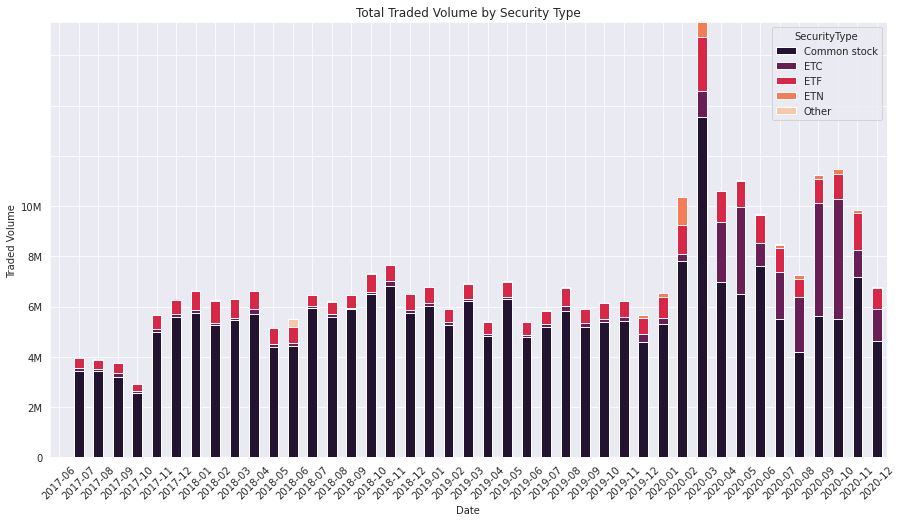

In [14]:
plt.clf()

fig, ax = plt.subplots()
xticklabels = eda_1piv.columns
yticklabels = ['0', '2M', '4M', '6M', '8M', '10M']

fig = (eda_1piv.T.plot(kind='bar', stacked=True,
                      colormap=ListedColormap(sns.color_palette('rocket', 
                                                                10)), 
                      figsize=(15,8), ax=ax)
      .set(xlabel="Date", ylabel="Traded Volume",
           title='Total Traded Volume by Security Type'))
ax.set_xticklabels(xticklabels, rotation = 45)
ax.set_yticklabels(yticklabels);

%matplot plt

<p style = 'text-align: center;'><b>Figure 5. </b>Total Traded Volume by Security Type</p>

There are different varieties of securities traded in the stock market.`Common stock` is a security that represents ownership in a corporation. On the other hand, an `exchange-traded commodity (ETC)` can offer traders and investors exposure to commodities like metals, energy, and livestock. Traded in shares on exchanges like shares of stock, prices fluctuate in value based on price changes of the ETC's underlying commodities. `Exchange-traded notes (ETNs)` are types of unsecured debt securities that track an underlying index of securities and trade on a major exchange like a stock. ETNs are similar to bonds but do not have interest payments. Instead, the prices of ETNs fluctuate like stocks. Others, aside from those that were initially mentioned are all lumped under the `Other` security type. 

**Figure 5** shows the total traded volume by security type per month from June 2017 to YTD 2020. It is noteworthy to mention how much the traded volume shooted up during March 2020. The Covid-19 pandemic started last Nov 2019 but its effect on the world economy started showing effect in the start of 2020. Looking at the price trend, stock indexes were lowest on this month (March 2020). Investors took this opportunity to trade thier stocks (sell stocks before further dropping and buy stocks that dropped) in order to avoid further losses, or gain somewhere in the future, when the economy tries to bounce back from the effect of the pandemic. 

## Price Trend of the Top 10 Constituents of the EURO STOXX 50 Index

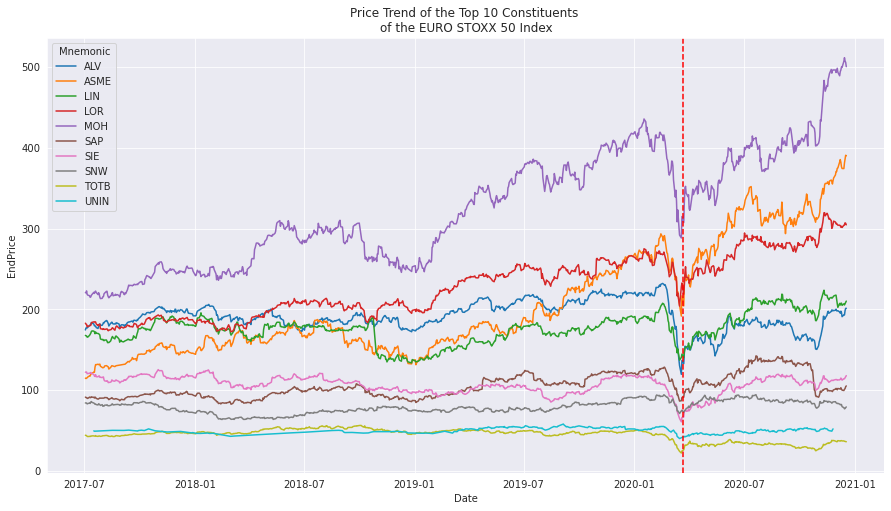

In [15]:
eu_stoxx = ['ASME', 'MOH', 'LIN', 'SAP', 'SNW', 
            'SIE', 'TOTB', 'LOR', 'UNIN', 'ALV']

eda_2 = df3[df3["Mnemonic"].isin(eu_stoxx)]
eda_2 = (eda_2.groupby(['Date', 'Mnemonic'])
         .agg({'EndPrice':'mean'})).reset_index()

eda_2['Date'] = pd.to_datetime(eda_2['Date'], format="%Y-%m-%d")


plt.clf()

fig, ax = plt.subplots(figsize=(15,8))
fig = sns.lineplot(data=eda_2, x='Date', y='EndPrice', ax=ax, hue='Mnemonic')
ax.axvline(x=pd.to_datetime('2020-03-21'), color='red', linestyle='--')
ax.set_title("""Price Trend of the Top 10 Constituents 
of the EURO STOXX 50 Index""", loc='center')
sns.set()
plt.show()

%matplot plt

<p style = 'text-align: center;'><b>Figure 6. </b>Price Trend of the Top 10 Constituents of the EURO STOXX 50 Index</p>

In relation to Figure 5, **Figure 6** shows the price trend of the top 10 constituents of the Euro Stoxx 50 Index, a stock index of Eurozone stocks designed by STOXX, an index provider owned by Deutsche Börse Group. According to STOXX, its goal is "to provide a blue-chip representation of Supersector leaders in the Eurozone". It is made up of fifty of the largest and most liquid stocks. It can be seen from the trend how stock prices plummeted down in March 2020. This was called **2020 stock market crash, also referred to as the Coronavirus Crash**, was a major and sudden global stock market crash that began on 20 February 2020 and ended on 7 April.

## Price Trend of the Daimler AG (DAI) Stock

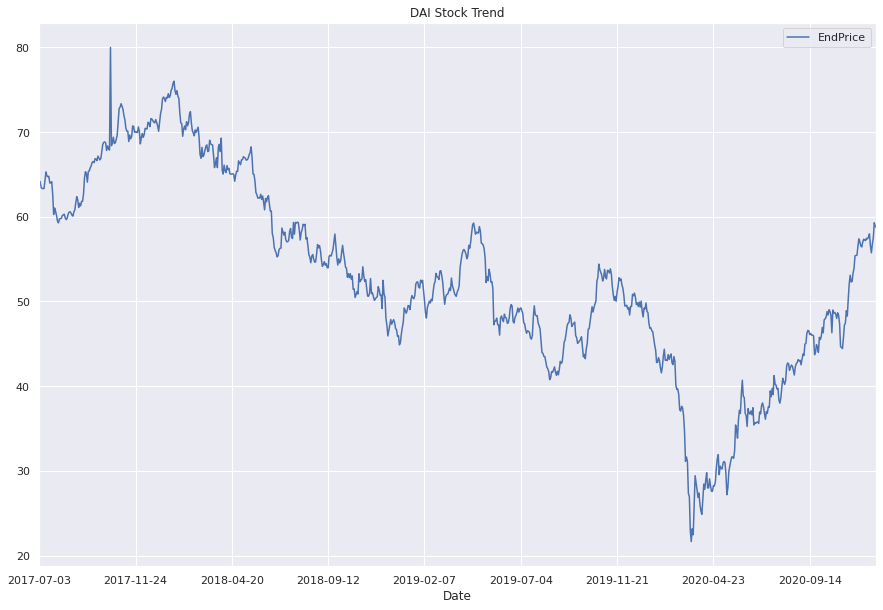

In [16]:
plt.clf()

mnemonic = top_l[0]
selected = (df3[df3.Mnemonic == mnemonic].groupby(['Date'])
            .agg({'EndPrice':'mean'}))

selected.groupby(['Date']).mean().plot()
plt.title(f'{mnemonic} Stock Trend');

%matplot plt

<p style = 'text-align: center;'><b>Figure 7. </b>Daimler AG (DAI) Stock Price Trend from 2017 to YTD 2020</p>

**Figure 7** shows the stock performance of Daimler AG or Mercedes-Benz, a German multinational automotive corporation headquartered in Stuttgart, Baden-Württemberg. It is one of the world's leading car and truck manufacturers. *Looking at the trend, the stock price generally has a downward trend, having around 80 to 100 EUR per stock, to just 60 to 70 EUR even before the economic effect of Covid-19 became evident.*

## Price Percent Change of the DAI Stock

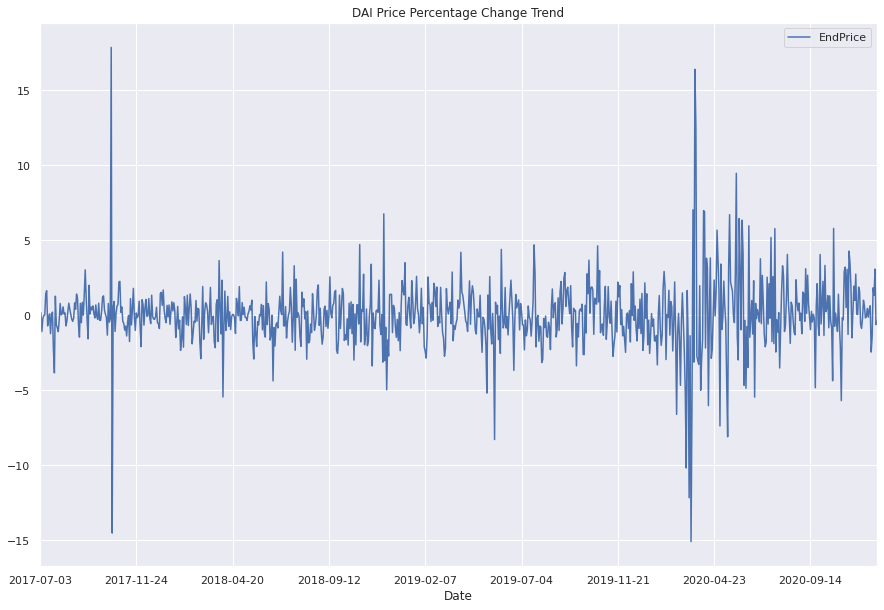

In [17]:
plt.clf()

selected2 = selected.groupby(['Date']).mean().reset_index()
selected2['EndPrice'] = selected2['EndPrice'].pct_change()*100
selected2.groupby(['Date']).mean().plot()
plt.title(f'{mnemonic} Price Percentage Change Trend');

%matplot plt

<p style = 'text-align: center;'><b>Figure 8. </b>Daimler AG (DAI) Stock Price Percentage Change Trend from 2017 to YTD 2020</p>

**Figure 8** shows the Stock Price Percentage Change Trend of DAI. This chart shows the price fluctuations per day. It can be seen that there are certain times when the peaks are high which means that stock price increased significantly (1Q 2018), while there are very low peaks as well (4Q 2018 to 1H 2019). Still, the effect of the Coronavirus Crash, brought about by the pandemic, is evident in the month of March 2020.  

<h1 style="font-size: 25px; color:#CC171D; align: center; #777777; font-family: 'Roboto Light'">STOCK PRICE PREDICTION</h1>

Different models were trained and evaluated to see how each would perform given the historical data that will be fed into the model. A regression model was used to predict the closing price of DAI, while various classification models were used to predict if the stock price would go up or down based on the previous day's price. 

## Processing the Data

In [18]:
df4 = spark.createDataFrame(df3[df3.Mnemonic == mnemonic])

In [19]:
win = Window.orderBy(F.monotonically_increasing_id())
df4 = df4.withColumn("id",F.row_number().over(win))
df4 = df4.withColumn("change", (F.col('EndPrice')>=F.lag(df4['EndPrice'])
                                .over(win)))

Since models such as ARIMA or LSTM require additional libraries, the date column was split into the year, month, and day, to allow for some level of seasonality, if present, to be accounted for in the simpler models chosen for this project. This split also allowed Tree models to be used which would not have worked for unseen data forecasting otherwise.

In [20]:
split_col = F.split(df4['Date'], '-')
df4 = df4.withColumn('year', split_col.getItem(0))
df4 = df4.withColumn('month', split_col.getItem(1))
df4 = df4.withColumn('day', split_col.getItem(2))
df4 = df4.select(df4.year.cast("int"), df4.month.cast("int"),
df4.day.cast("int"), df4.id.cast("int"),
df4.EndPrice.cast("float"), df4.TradedVolume.cast("long"),
df4.change.cast("int"))

## Building the Model

### Predicting the Closing Price of DAI

In [21]:
df4.columns

['year', 'month', 'day', 'id', 'EndPrice', 'TradedVolume', 'change']

In [22]:
assembler = VectorAssembler(inputCols=['year', 'month', 'day', 
                                       'TradedVolume'], 
                            outputCol='features')
df_vector = assembler.transform(df4)

In [23]:
num = df4.count()
num_train = num-25
print(f'Train Size = {num_train}, Test Size = 25')

Train Size = 845, Test Size = 25


In [24]:
df_train = df_vector[df_vector['id']<=num_train]
df_test = df_vector[df_vector['id']>num_train]

In [25]:
model = LinearRegression(featuresCol='features', labelCol='EndPrice')
model_trained = model.fit(df_train)
df_predict = model_trained.transform(df_test)

In [26]:
df_predict[['features', 'EndPrice', 'prediction']].show()

+--------------------+---------+------------------+
|            features| EndPrice|        prediction|
+--------------------+---------+------------------+
|[2020.0,11.0,16.0...| 53.37713| 36.80527525312209|
|[2020.0,11.0,17.0...|53.908955| 37.46712999499141|
|[2020.0,11.0,18.0...|55.388577|36.491882978982176|
|[2020.0,11.0,19.0...|55.431427| 37.10600575699573|
|[2020.0,11.0,20.0...|55.454563|38.086871552528464|
|[2020.0,11.0,23.0...|56.495815| 36.63535187961679|
|[2020.0,11.0,24.0...|57.397606| 35.76727540412685|
|[2020.0,11.0,25.0...|57.056324|37.699075160755456|
|[2020.0,11.0,26.0...|56.557858| 38.93254514943328|
|[2020.0,11.0,27.0...| 56.43816| 37.79901556902405|
|[2020.0,11.0,30.0...|57.003273| 35.06728059890156|
|[2020.0,12.0,1.0,...|57.357613| 38.65738446528849|
|[2020.0,12.0,2.0,...|57.257103| 39.19597890440127|
|[2020.0,12.0,3.0,...|57.200268| 38.64424248056821|
|[2020.0,12.0,4.0,...|57.465034| 37.08067246916471|
|[2020.0,12.0,7.0,...|57.392845|  39.0845720242105|
|[2020.0,12.

### Predicting the Price Change of DAI (1: UP, 0: DOWN)

In [27]:
model2 = LogisticRegression(featuresCol='features', labelCol='change')
model_trained2 = model2.fit(df_train.dropna())
df_predict2 = model_trained2.transform(df_test)

In [28]:
df_predict2[['features', 'change', 'prediction']].show()

+--------------------+------+----------+
|            features|change|prediction|
+--------------------+------+----------+
|[2020.0,11.0,16.0...|     1|       0.0|
|[2020.0,11.0,17.0...|     1|       0.0|
|[2020.0,11.0,18.0...|     1|       0.0|
|[2020.0,11.0,19.0...|     1|       0.0|
|[2020.0,11.0,20.0...|     1|       0.0|
|[2020.0,11.0,23.0...|     1|       0.0|
|[2020.0,11.0,24.0...|     1|       0.0|
|[2020.0,11.0,25.0...|     0|       0.0|
|[2020.0,11.0,26.0...|     0|       0.0|
|[2020.0,11.0,27.0...|     0|       0.0|
|[2020.0,11.0,30.0...|     1|       0.0|
|[2020.0,12.0,1.0,...|     1|       1.0|
|[2020.0,12.0,2.0,...|     0|       1.0|
|[2020.0,12.0,3.0,...|     0|       1.0|
|[2020.0,12.0,4.0,...|     1|       1.0|
|[2020.0,12.0,7.0,...|     0|       1.0|
|[2020.0,12.0,8.0,...|     1|       1.0|
|[2020.0,12.0,9.0,...|     1|       1.0|
|[2020.0,12.0,10.0...|     0|       1.0|
|[2020.0,12.0,11.0...|     0|       1.0|
+--------------------+------+----------+
only showing top

In [29]:
model3 = DecisionTreeClassifier(featuresCol='features',
 labelCol='change')
model_trained3 = model3.fit(df_train.dropna())
df_predict3 = model_trained3.transform(df_test)

In [30]:
model4 = RandomForestClassifier(featuresCol='features',
 labelCol='change')
model_trained4 = model4.fit(df_train.dropna())
df_predict4 = model_trained4.transform(df_test)

In [31]:
model5 = GBTClassifier(featuresCol='features',
 labelCol='change')
model_trained5 = model5.fit(df_train.dropna())
df_predict5 = model_trained5.transform(df_test)

## Evaluating the Model

### Evaluation of Regression Models

In [32]:
evaluator = score(labelCol='EndPrice', metricName='mae')
print(f'MAE = {evaluator.evaluate(df_predict)}')

MAE = 19.468819860772783


### Evaluation of Classification Models

In [33]:
evaluator2 = BinaryClassificationEvaluator(rawPredictionCol='prediction',
 labelCol='change')
print('Logistic Regression: Test Area Under ROC = ',
      evaluator2.evaluate(df_predict2))

Logistic Regression: Test Area Under ROC =  0.39999999999999997


In [34]:
print('Decision Tree: Test Area Under ROC = ',
      evaluator2.evaluate(df_predict3))

Decision Tree: Test Area Under ROC =  0.5833333333333333


In [35]:
print('Random Forest: Test Area Under ROC = ',
      evaluator2.evaluate(df_predict4))

Random Forest: Test Area Under ROC =  0.5


In [36]:
print('GBT Classifier: Test Area Under ROC = ',
      evaluator2.evaluate(df_predict5))

GBT Classifier: Test Area Under ROC =  0.5666666666666667


<h1 style="font-size: 25px; color:#4d181c; align: center; #777777; font-family: 'Roboto Light'">RESULTS & INSIGHTS</h1>

During the Exploratory Data Analysis, it is quite evident that different stocks have different stock price behaviors as shown in Figure 4. However, it can also be observed that the economic environment can have a positive or negative impact on a collective type of companies or stocks. The Coronavirus Crash of 2020 shows that majority of the European stocks plummeted down. This crash was the fastest and most devastating fall in global stock markets since the Wall Street Crash of 1929. According to Bloomberg, various global indices went down by 25% to 40% . Following this market crash was the Covid-19 recession. Figure 3 shows a spike in traded volume during the month of March 2020 which signifies either sudden buying or selling of stocks or other securities. Figures 5 and 6 shows the performance of Daimler AG (DAI), more commonly known as Mercedes-Benz, which was not exempt from the global economic downfall of 2020. 

 

We have chosen to predict DAI's stock price since it is the company which has the most number of transactions given a specific time period (June 2017 to YTD 2020). Linear regression was used to predict end prices for the last 20 days (test set) by training the model on the historical data (June 2017 to Oct 2020) of DAI. A Mean Absolute Error (MAE) of 19.479 Euros was obtained using this model, which means that the predicted price can fluctuate by plus or minus 19.479. Also, we tried to predict increase or decrease (1 if higher and 0 if lower) of price relative to the previous day's price. The table below summarizes the results of various models that were used: 

 

| ML Classification Models | ROC Curve Score |  
| --- | --- |  
| Logistic Regression | 0.3999 |  
| **Decision Trees Classifier** | **0.5833** |
| Random Forest Classifier | 0.5000 |
| Gradient Boosting Classifier | 0.5667 |

 


<p style = 'text-align: center;'><b>Table 1. </b>ROC Curve Scores of various ML Classification models for predicting if DAI stock price per day goes up or down. </p>

 

It can be seen from Table 1 that **Decision Trees Classifier was able to outperform other ML models, gaining an AUC ROC score of 0.5833**. This means that the trained model can predict or distinguish if DAI's stock price will go up or down relative to the previous day's price by only 58.33%. Although the score may not be that remarkable if the objective is to make significant profit out of the stock market, the study can serve as proof of concept for algorithmic trading using big data. Further improvements such as Hyperparameter tuning and training Deep Learning algorithms/models can be also be conducted to further enhance the performance of the model. Also, a possible reason why the performance of the model is relatively low is because of the current situation (Covid-19 pandemic) or economic environment (i.e., the New Normal). Since nothing as big as what happened during the Great Coronavirus Crash of 2020 happened during the previous years (2017 to 2019), the model will have a hard time capturing the trend or seasonality of the data since it has not yet seen this data behavior during training. 

<h1 style="font-size: 25px; color:#162336; align: center; #777777; font-family: 'Roboto Light'">CONCLUSION & RECOMMENDATIONS</h1>

Various machine learning models can be implemented for Big Data using PySpark’s MLlib package. Regression and classification models can be trained using basic stock data, such as the date, volume, and historical prices too predict end price of a specific stock. However, using basic machine learning models (i.e., linear regression and logistic regression) only resulted to accuracies as good as human guess. One reason is because of the fact that the stock market is highly non-linear, making accurate predictions very complex and difficult. 

To further improve the project, deep learning models can also be used to predict stock prices or percentage changes.  Several studies have been published that utilized more complex algorithms for this purpose. Also, hyperparameter tuning using grid search can also be included in the pipeline or methodology. Although this can greatly increase training time and given the fact that we are dealing with big data, this can still be an option to further improve accuracy. To further expand the study, other stocks can also be used for prediction since different stocks can have different price trend/behavior. Also, the study can further be developed into a portfolio optimization problem that will maximize returns given the predicted prices.

<h1 style="font-size: 25px; color:#325765; align: center; #777777; font-family: 'Roboto Light'">REFERENCES</h1>

[1] Coy, P. (2020, March 19). The Great Coronavirus Crash of 2020 Is Different. Retrieved December 22, 2020, from https://www.bloomberg.com/news/articles/2020-03-19/the-great-coronavirus-crash-of-2020-is-different

[2] Deutsche Borse’s Xetra and Eurex trading systems available on RadianzNet. (2020, December 20). Bobsguide. https://www.bobsguide.com/guide/news/2005/Nov/9/deutsche-borses-xetra-and-eurex-trading-systems-available-on-radianznet/Mehtab

[3] Exchange-Traded Commodities (ETCs). (2019, Jul). Investopedia. https://www.investopedia.com/terms/e/exchangetraded-commodity-etc.aspVijh

[4] M., Chandola, D., Tikkiwal, V. A., & Kumar, A. (2020). Stock Closing Price Prediction using Machine Learning Techniques. Procedia Computer Science, 167, 599–606. https://doi.org/10.1016/j.procs.2020.03.326

[5] Sen, J., & Dutta, A. (2020, September 20). Stock Price Prediction Using Machine Learning and LSTM-Based Deep Learning Models. ArXiv.Org. https://arxiv.org/abs/2009.10819Mokalled 

[6] Singh, A. (2020, October 18). Stock Prices Prediction Using Machine Learning and Deep Learning Techniques (with Python codes). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/Understanding

[7] W. E. M. (2019, August). Automated Stock Price Prediction Using Machine Learning. ACL Anthology. https://www.aclweb.org/anthology/W19-6403/

[8] Wikipedia contributors. (2020, October). Deutsche Börse. Wikipedia. https://en.wikipedia.org/wiki/Deutsche_B%C3%B6rse

[9] Wikipedia contributors. (2020, December). 2020 stock market crash. Wikipedia. https://en.wikipedia.org/wiki/2020_stock_market_crash

[10] Wikipedia contributors. (2020, December). EURO STOXX 50. Wikipedia. https://en.wikipedia.org/wiki/EURO_STOXX_50